# **Aula 09 - Redes Neurais: MultiLayer Perceptron (MLP)**
Sílvia Moraes
---
Neste exemplo usamos o **dataset da planta velha**, disponível em https://archive.ics.uci.edu/dataset/53/velha


In [19]:
#importando os pacotes usados
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Fazendo a carga do dataset e gerando os conjuntos X (atributos de entrada) e Y (tipo de planta velha).

In [24]:
#Exemplo com a planta velha
velha = pd.read_csv("amostras_.csv",sep=';')
print(velha.shape)
X = velha.iloc[:, [0, 1, 2, 3,4,5,6,7,8]].values
y = velha.iloc[:, [9]].values


(231, 10)


Printando os dados de entrada e os rótulos de cada coluna.

In [26]:
print("DADOS DE ENTRADA")
print(velha.columns[0],velha.columns[1], velha.columns[2], velha.columns[3],velha.columns[4],velha.columns[5],velha.columns[6],velha.columns[7],velha.columns[8])
print(X)

DADOS DE ENTRADA
pos1 pos2 pos3 pos4 pos5 pos6 pos7 pos8 pos9
[[ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1 -1  0 ...  0  0  0]
 ...
 [-1  1  1 ... -1  1  1]
 [-1  1  1 ... -1 -1  1]
 [-1 -1  1 ... -1  1  1]]


In [28]:
print("DADOS DE SAÍDA")
print("Classe do jogo da velha")
print(y)

DADOS DE SAÍDA
Classe do jogo da velha
[['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo

Divisão dos conjuntos de treino e teste usando o método train_test_split. O conjunto de treino ficou com 80% dos dados e o restante, 20%, ficou para o conjunto de teste.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [32]:
print("----------Conjunto de Treino-----------")
for i in range(0,len(X_train)):
  print(i,"-", X_train[i],"-",y_train[i])

----------Conjunto de Treino-----------
0 - [ 0  1 -1  1  1 -1  0 -1  0] - ['Em_jogo']
1 - [ 0  1 -1  1  0  0  0 -1  1] - ['Em_jogo']
2 - [0 1 0 0 0 0 0 0 0] - ['Em_jogo']
3 - [ 1 -1  1 -1  1  1 -1  0  0] - ['Em_jogo']
4 - [-1  1 -1  1 -1  1  0  1  0] - ['Possibilidade_de_fim_de_jogo']
5 - [-1  1 -1  1 -1  1  0  1 -1] - ['Fim_de_jogo']
6 - [ 0  1 -1  1 -1  0  1 -1  0] - ['Possibilidade_de_fim_de_jogo']
7 - [ 0  1 -1  1  0  1 -1  1 -1] - ['Possibilidade_de_fim_de_jogo']
8 - [ 0  1 -1  1 -1  0 -1  1  0] - ['Fim_de_jogo']
9 - [ 1 -1  1 -1  1 -1  0  0  1] - ['Fim_de_jogo']
10 - [ 1 -1  1 -1  1  0  0  0 -1] - ['Possibilidade_de_fim_de_jogo']
11 - [ 1 -1  1 -1  0 -1  1  1 -1] - ['Possibilidade_de_fim_de_jogo']
12 - [-1  1  1  1 -1 -1  1 -1  1] - ['Fim_de_jogo']
13 - [-1  1 -1  1 -1  0  0  1  0] - ['Em_jogo']
14 - [ 1 -1  1 -1  0  0  1 -1  0] - ['Possibilidade_de_fim_de_jogo']
15 - [ 1 -1  1 -1 -1  0  1  1 -1] - ['Possibilidade_de_fim_de_jogo']
16 - [ 1 -1  1 -1  0  0 -1  1  1] - ['Em_jogo']


In [31]:
print("\n----------Conjunto de Teste-----------")
for i in range(0,len(X_test)):
  print(i,"-",X_test[i],"-",y_test[i])


----------Conjunto de Teste-----------
0 - [1 0 0 0 0 0 0 0 0] - ['Em_jogo']
1 - [ 1 -1  1 -1  0 -1  1 -1  1] - ['Possibilidade_de_fim_de_jogo']
2 - [ 0  1 -1  1  1  0 -1 -1  1] - ['Em_jogo']
3 - [ 0  1 -1  1 -1 -1  0  1  1] - ['Possibilidade_de_fim_de_jogo']
4 - [ 0  1 -1  1  0 -1 -1  1  0] - ['Possibilidade_de_fim_de_jogo']
5 - [ 1 -1  1 -1  0 -1  1  0  0] - ['Possibilidade_de_fim_de_jogo']
6 - [-1  1 -1  1  1 -1  1  0 -1] - ['Fim_de_jogo']
7 - [ 1 -1  1 -1 -1  0  1  0  1] - ['Possibilidade_de_fim_de_jogo']
8 - [ 0  1 -1  1 -1  1  0  0  0] - ['Possibilidade_de_fim_de_jogo']
9 - [-1  1 -1  1  0  0  1 -1  0] - ['Em_jogo']
10 - [ 1 -1  1 -1 -1  0  0  1  0] - ['Em_jogo']
11 - [ 0  1 -1  1  1  0  0 -1  0] - ['Em_jogo']
12 - [-1  1 -1  1 -1  0  1  0  0] - ['Em_jogo']
13 - [-1 -1  1  1  1 -1 -1  1  1] - ['Fim_de_jogo']
14 - [-1  1 -1 -1  1  1 -1  0  1] - ['Fim_de_jogo']
15 - [ 1 -1  1 -1  1  1  1 -1 -1] - ['Fim_de_jogo']
16 - [-1  1 -1  1  0  0 -1  0  1] - ['Em_jogo']
17 - [-1  1 -1  1  1 

Gerando o classificador com a seguinte configuração:

*   algoritmo: adam
*   40 neurônios na camada oculta, portanto a topologia resultante foi 4 x 40 x 3
*   taxa de aprendizagem inicial de 0.1
*   constante de momentum de 0.5

Função de perda geralmente inferior a 0.05.




In [41]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(40,), learning_rate_init=0.1, momentum=0.5, verbose=True)
clf.fit(X_train, y_train)

Iteration 1, loss = 1.25899249
Iteration 2, loss = 1.40294002
Iteration 3, loss = 1.07816189
Iteration 4, loss = 0.99737076
Iteration 5, loss = 0.95728505
Iteration 6, loss = 0.89349644
Iteration 7, loss = 0.86672456
Iteration 8, loss = 0.81820687
Iteration 9, loss = 0.75468442
Iteration 10, loss = 0.71010658
Iteration 11, loss = 0.67285272
Iteration 12, loss = 0.63110348
Iteration 13, loss = 0.59390900
Iteration 14, loss = 0.56412124
Iteration 15, loss = 0.52527508
Iteration 16, loss = 0.48415926
Iteration 17, loss = 0.45882802
Iteration 18, loss = 0.42091897
Iteration 19, loss = 0.39249447
Iteration 20, loss = 0.36968336
Iteration 21, loss = 0.33250528
Iteration 22, loss = 0.31430394
Iteration 23, loss = 0.28650737
Iteration 24, loss = 0.26120600
Iteration 25, loss = 0.24325689
Iteration 26, loss = 0.22263498
Iteration 27, loss = 0.21032626
Iteration 28, loss = 0.19244546
Iteration 29, loss = 0.17400402
Iteration 30, loss = 0.16212007
Iteration 31, loss = 0.14989703
Iteration 32, los

/home/lucas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,hidden_layer_sizes,"(40,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


Executando a predição para as entradas (X) do conjunto de teste.

In [42]:
y_predicao = clf.predict(X_test)

Exibindo os resultados por meio da matriz de confusão. É pela matriz de confusão de conseguimos verificar os erros e acertos dos classificadores.
Os acertos estão sempre na diagonal principal.

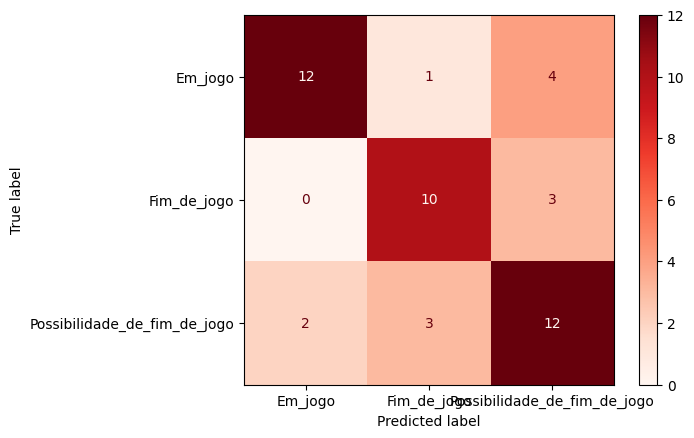

In [45]:
nomes_classes = velha.iloc[:, [9]].values
classes_unicas = np.unique(nomes_classes)
#print(classes_unicas)

cm = confusion_matrix(y_test, y_predicao)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_unicas)
disp.plot(cmap='Reds')

No trecho abaixo, mostramos a forma de cálculo da acurácia. E também executamos o método accuracy_score que igualmente calcula a acurácia. Executando ainda o método classification_report que calcula as métricas conhecidas precision, recall e f-measure.

In [47]:
acerto = 0
for i in range(0, len(y_predicao)):
  if y_predicao[i]==y_test[i]: acerto = acerto + 1

print("Acuracia: ", acerto/len(y_predicao))
print(accuracy_score(y_test, y_predicao))
print(classification_report(y_test, y_predicao))

Acuracia:  0.723404255319149
0.723404255319149
                              precision    recall  f1-score   support

                     Em_jogo       0.86      0.71      0.77        17
                 Fim_de_jogo       0.71      0.77      0.74        13
Possibilidade_de_fim_de_jogo       0.63      0.71      0.67        17

                    accuracy                           0.72        47
                   macro avg       0.73      0.73      0.73        47
                weighted avg       0.74      0.72      0.73        47



Abaixo, exibimos as classes e os pesos (modelo) encontrado no treinamento.

In [48]:
print("Classes: ", clf.classes_ )
print("Melhor loss: ", clf.best_loss_)
print(clf.coefs_)
print(clf.intercepts_)
print(clf.get_params)

Classes:  ['Em_jogo' 'Fim_de_jogo' 'Possibilidade_de_fim_de_jogo']
Melhor loss:  0.0038905760573451687
[array([[ 1.33336231e+00,  3.61800353e-01,  3.27394370e-01,
         3.44648334e-01, -2.07677946e+00, -5.60479341e-01,
        -1.25899876e+00, -7.95741590e-01,  9.89065213e-01,
         9.83962758e-01, -8.54110429e-01,  1.26086286e+00,
        -6.11921372e-02, -7.14533360e-01, -2.85401017e-01,
         9.58404320e-01, -4.86054280e-01, -1.64966975e+00,
        -2.30131253e+00, -2.15903135e-01, -1.70958341e+00,
         3.14867895e-01, -3.83606401e-01, -1.89450400e+00,
         1.25587616e+00, -2.01115725e-02,  9.38874018e-01,
        -5.13831339e-01, -1.18856878e+00, -4.57256045e-01,
        -7.92111587e-01,  9.35285846e-01,  1.47396026e-01,
        -2.83488210e-01, -1.26024753e+00, -1.98934321e-01,
         5.00575303e-01,  1.46898307e+00,  4.91238970e-01,
        -2.16833351e+00],
       [-1.90851646e+00, -1.32523975e-01,  8.10048232e-01,
         7.18658316e-01,  2.70287324e-02, -5